 ## 💡Title - Nashik Aadhaar Enrollment 2025

## 🚀 Problem Statement

UIDAI requires data-driven insights to improve Aadhaar enrollment efficiency and outreach.  
Enrollment patterns often vary across time, and certain demographic groups—especially children—may be under-enrolled during specific periods.

The objective of this project is to analyze Aadhaar enrollment data for Nashik district to:

- Understand monthly enrollment trends
- Identify peak and low enrollment periods
- Analyze children enrollment behavior
- Derive insights that can support better planning of enrollment drives

This analysis aims to assist UIDAI in making informed operational and policy-level decisions.


## 1. Import Necessary Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Data cleaning and Preprocessing

In [151]:
df=pd.read_csv("Adhar_Card_enrollment.csv")

In [152]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,01-09-2025,Maharashtra,Nashik,422004,3,2,0
1,01-09-2025,Maharashtra,Nashik,422005,2,0,0
2,01-09-2025,Maharashtra,Nashik,422010,3,4,0
3,01-09-2025,Maharashtra,Nashik,422011,2,0,0
4,01-09-2025,Maharashtra,Nashik,422204,4,2,0


In [153]:
df.tail()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
4491,19-06-2025,Maharashtra,Nashik,422208,3,0,0
4492,19-06-2025,Maharashtra,Nashik,422308,1,0,0
4493,19-06-2025,Maharashtra,Nashik,423203,20,68,0
4494,19-06-2025,Maharashtra,Nashik,423205,0,3,0
4495,19-06-2025,Maharashtra,Nashik,423301,5,2,0


In [154]:
df.shape

(4496, 7)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496 entries, 0 to 4495
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4496 non-null   object
 1   state           4496 non-null   object
 2   district        4496 non-null   object
 3   pincode         4496 non-null   int64 
 4   age_0_5         4496 non-null   int64 
 5   age_5_17        4496 non-null   int64 
 6   age_18_greater  4496 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 246.0+ KB


In [156]:
df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,4496.000000,4496.000000,4496.000000,4496.000000
mean,422585.246441,4.286254,1.710632,0.083407
std,556.031016,24.596185,18.625067,1.117534
min,422001.000000,0.000000,0.000000,0.000000
25%,422103.000000,1.000000,0.000000,0.000000
50%,422303.000000,2.000000,0.000000,0.000000
75%,423201.000000,4.000000,1.000000,0.000000
max,424109.000000,1476.000000,1183.000000,45.000000


In [157]:
df.dtypes

date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object

In [158]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

## 3.Skewness Analysis of Enrollment Data


In [159]:
df['age_0_5'].skew()

np.float64(49.94501502092002)

In [160]:
df['age_5_17'].skew()

np.float64(57.615699167956556)

In [161]:
df['age_18_greater'].skew()

np.float64(29.621372647026817)

In [162]:
num_df=df[['age_0_5','age_5_17','age_18_greater']]

## The distribution shows **positive skewness**, which indicates that the data is **right-skewed**.  
#### This means most enrollment values are concentrated on the lower side, with a longer tail extending toward higher values.

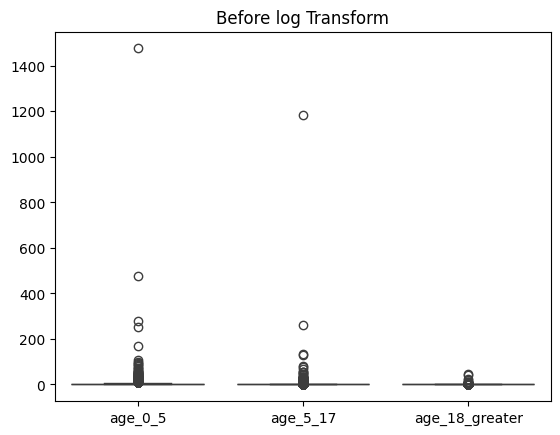

In [163]:
sns.boxplot(num_df)
plt.title("Before log Transform")
plt.show()

## 3.1 Log Transformation to Reduce Skewness
Due to the presence of positive (right) skewness in the enrollment data, a log transformation was applied.

Log transformation helps to:
- Reduce the impact of extreme values
- Compress the right tail of the distribution
- Make the data more symmetric
- Improve interpretability and suitability for further analysis


In [164]:
df['age_0_5_log']=np.log1p(df['age_0_5'])

In [165]:
df['age_5_17_log']=np.log1p(df['age_5_17'])

In [186]:
df['age_18+_log']=np.log1p(df['age_18_greater'])

In [187]:
df['age_0_5_log'].skew()

np.float64(1.0256978713699698)

In [188]:
df['age_5_17_log'].skew()

np.float64(1.7696002600556415)

In [189]:
df['age_18+_log'].skew()

np.float64(9.609427333155638)

In [190]:
num_df1=df[['age_0_5_log','age_5_17_log','age_18+_log']]

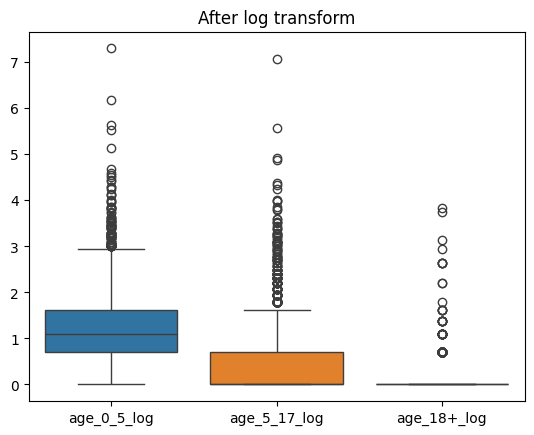

In [171]:
sns.boxplot(num_df1)
plt.title("After log transform")
plt.show()

After applying the log transformation, the distribution becomes more balanced across all age groups.

- The spread of the data is reduced
- Extreme outliers are compressed
- The median and interquartile range are more clearly visible

This confirms that the log transformation was effective in reducing skewness and improving distribution symmetry.


## 4. Visualization

### To analyze enrollment trends over time, it is necessary to extract meaningful temporal features from the date column.

Date extraction enables:
- Month-wise trend analysis
- Identification of seasonal patterns
- Comparison of enrollment activity across time periods

### From the enrollment date, the following components were extracted:
- Year – to understand long-term trends
- Month – to analyze monthly enrollment variations
- Month Name – for improved readability in visualizations


In [174]:
df['date'].head()

0   2025-09-01
1   2025-09-01
2   2025-09-01
3   2025-09-01
4   2025-09-01
Name: date, dtype: datetime64[ns]

In [175]:
df=df.sort_values('date')

In [176]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['month_name']=df['date'].dt.month_name()

In [177]:
df[['date','year','month','month_name']].head()

,date,year,month,month_name
2654,2025-05-01,2025,5,May
717,2025-06-09,2025,6,June
2531,2025-06-09,2025,6,June
1609,2025-06-09,2025,6,June
1608,2025-06-09,2025,6,June


## 📊 Monthly Enrollemt of Children

### 1.How does Adhaar enrollment for children vary across month?

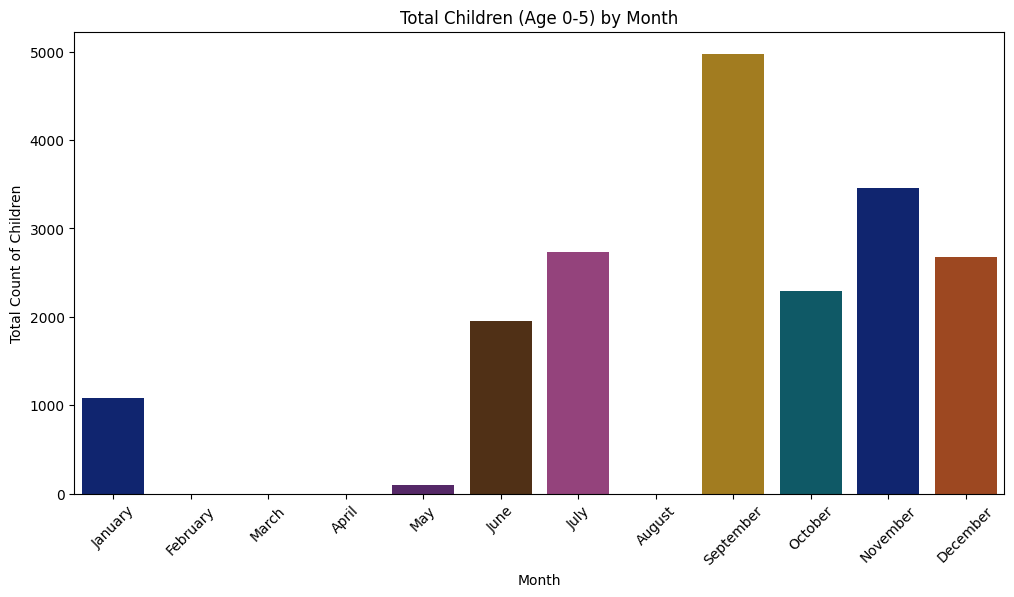

In [179]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = df.groupby('month_name')['age_0_5'].sum().reindex(month_order).fillna(0)
plt.figure(figsize=(12, 6))
sns.barplot(monthly_data,palette='dark')
plt.title('Total Children (Age 0-5) by Month')
plt.xlabel('Month')
plt.ylabel('Total Count of Children')
plt.xticks(rotation=45)
plt.show()

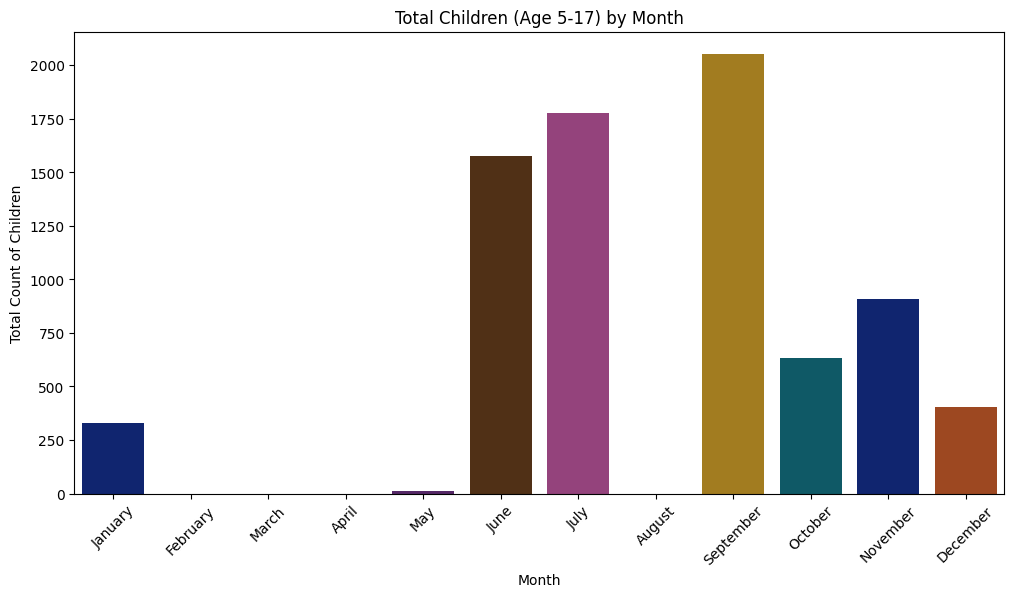

In [180]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = df.groupby('month_name')['age_5_17'].sum().reindex(month_order).fillna(0)
plt.figure(figsize=(12, 6))

sns.barplot(monthly_data,palette='dark')
plt.title('Total Children (Age 5-17) by Month')
plt.xlabel('Month')
plt.ylabel('Total Count of Children')
plt.xticks(rotation=45)
plt.show()

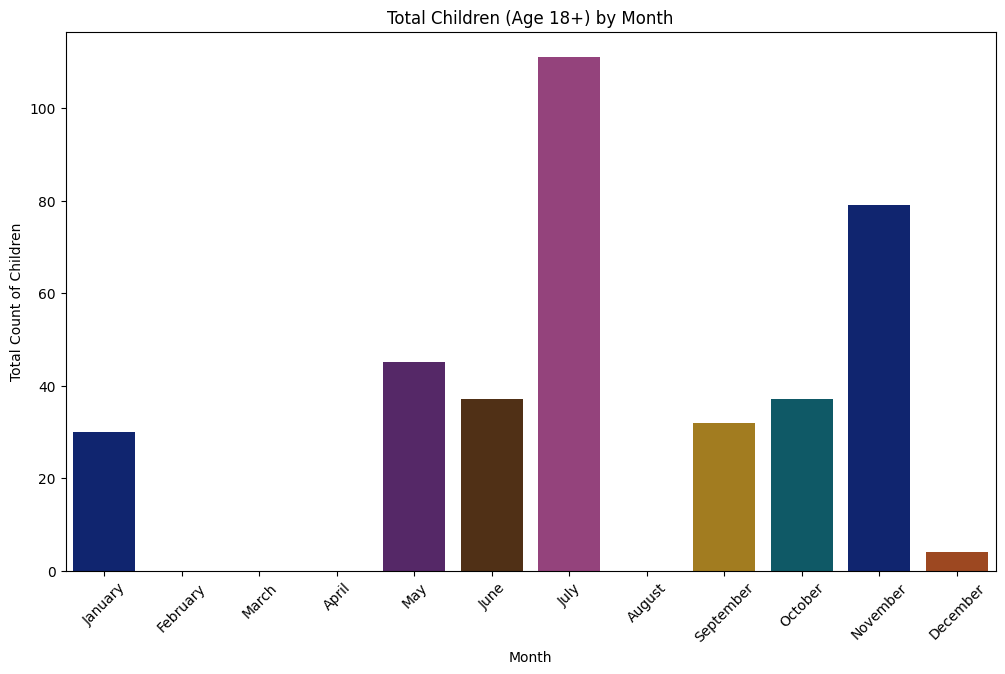

In [204]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = df.groupby('month_name')['age_18_greater'].sum().reindex(month_order).fillna(0)
plt.figure(figsize=(12, 7))
sns.barplot(monthly_data,palette='dark')
plt.title('Total Children (Age 18+) by Month')
plt.xlabel('Month')
plt.ylabel('Total Count of Children')
plt.xticks(rotation=45)
plt.show()

### Conclusion-
The month-wise bar chart shows that Aadhaar enrollment in Nashik is unevenly distributed across the year.  
Certain months record significantly higher enrollments, indicating the influence of seasonal factors such as awareness drives, administrative initiatives, or school admission cycles.

Conversely, low-enrollment months highlight periods where targeted outreach and additional enrollment camps can be effectively planned.


## 📊Percentage Contribution by Age Groups

### What is the Percentage contribution of each age group?

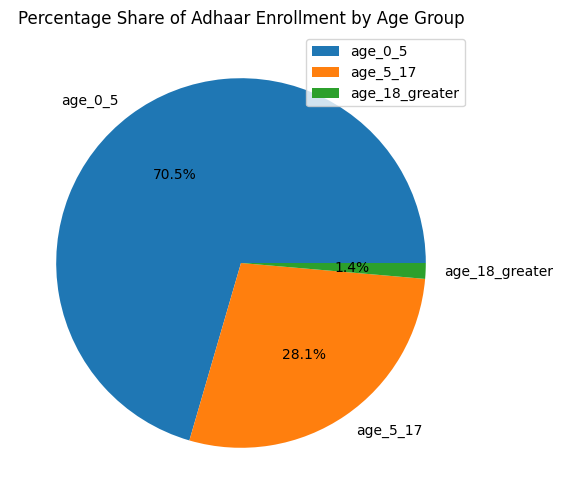

In [222]:
plt.figure(figsize=(12,6))
df['Total_Enrollment']=df[['age_0_5','age_5_17','age_18_greater']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title("Percentage Share of Adhaar Enrollment by Age Group")
plt.legend(loc='upper right')
plt.show()

### Conclusion-
The age-group-wise bar chart reveals that enrollment is highest for children aged 0–5, followed by the 5–17 age group, while the 18+ category shows comparatively lower or inconsistent enrollment.

This pattern suggests that Aadhaar enrollment is often prioritized during early life stages, particularly for accessing government schemes and school-related requirements.


## 📊  Top 10 Pincode Area where Aadhaar enrollment for All age Group

### Which pincode areas have the highest aadhar enrollemnt for children for all age group in nashik?

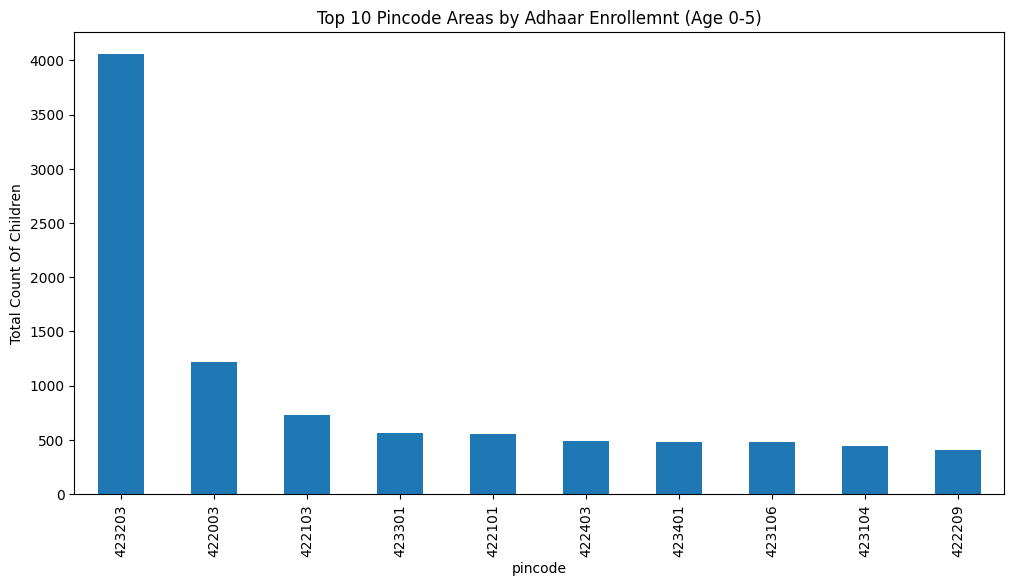

In [229]:
plt.figure(figsize=(12,6))
df.groupby('pincode')['age_0_5'].sum().nlargest(10).plot(kind='bar')
plt.ylabel("Total Count Of Children")
plt.title("Top 10 Pincode Areas by Adhaar Enrollemnt (Age 0-5)")
plt.show()

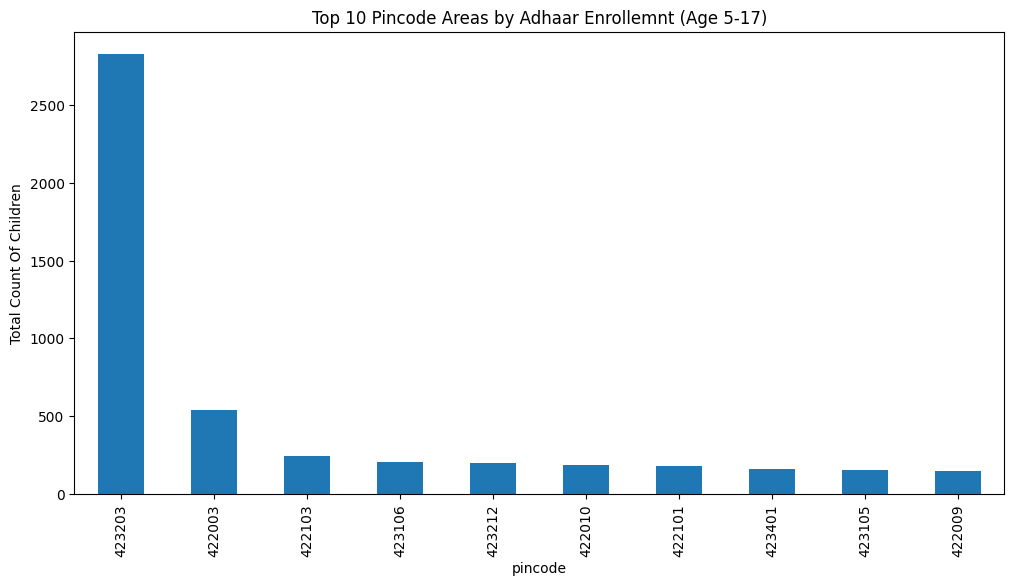

In [230]:
plt.figure(figsize=(12,6))
df.groupby('pincode')['age_5_17'].sum().nlargest(10).plot(kind='bar')
plt.ylabel("Total Count Of Children")
plt.title("Top 10 Pincode Areas by Adhaar Enrollemnt (Age 5-17)")
plt.show()

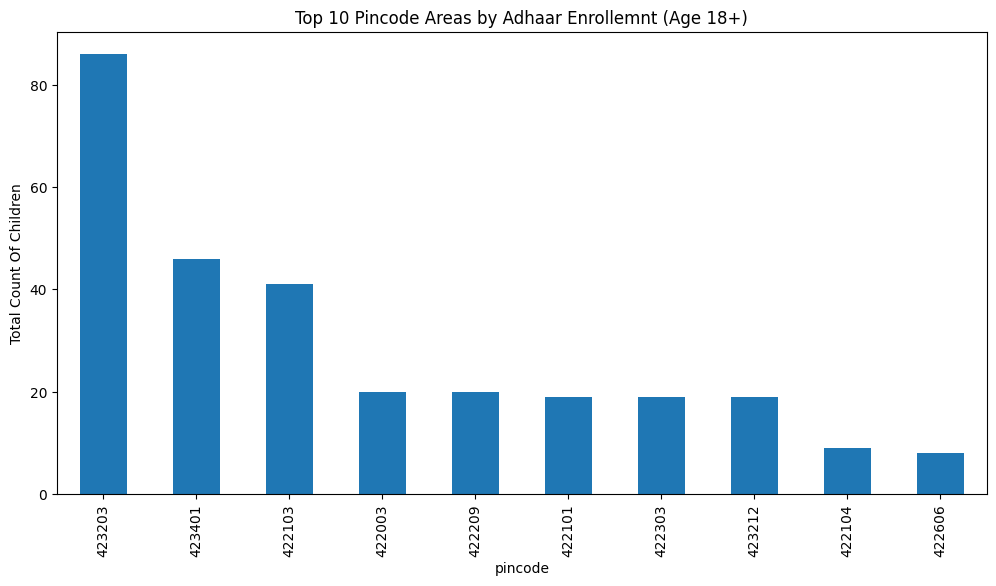

In [231]:
plt.figure(figsize=(12,6))
df.groupby('pincode')['age_18_greater'].sum().nlargest(10).plot(kind='bar')
plt.ylabel("Total Count Of Children")
plt.title("Top 10 Pincode Areas by Adhaar Enrollemnt (Age 18+)")
plt.show()

### Conclusion-
High-enrollment pincodes may correspond to urban centers or areas with better access to enrollment facilities,  
while low-enrollment pincodes highlight potential gaps in awareness, infrastructure, or accessibility.

These findings suggest that UIDAI can improve coverage by:
- Deploying mobile enrollment units in low-enrollment pincodes
- Increasing awareness campaigns in underperforming regions
- Optimizing center locations based on demand concentration


## Final Conclusion

This project conducted an exploratory data analysis of Aadhaar enrollment data for Nashik district to uncover temporal, demographic, and geographic patterns.

The analysis identified clear monthly variations in enrollment, significant differences across age groups, and strong right-skewness in enrollment distributions.  
Applying log transformation improved data interpretability, while date extraction enabled time-based trend analysis.

The pincode-wise analysis revealed uneven geographic distribution of enrollment, highlighting specific areas that may require targeted UIDAI interventions.

Overall, the project demonstrates how structured data analytics can support UIDAI in improving enrollment coverage, optimizing resources, and designing focused outreach strategies.
